<a href="https://colab.research.google.com/github/gmazzitelli/GSN2/blob/master/AnagraficheCSN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisi Anagrafiche CSN2

In [ ]:
# 
# data source https://reportgodiva.dsi.infn.it/ per anagrafiche
# data source https://dbprogetti.dsi.infn.it/dbprogetti/listaProgettiFE per progetti su fondi esterni
# https://drive.google.com/file/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/
# 
def load_from_gspreadsheet(key, sheet_name):
    # google spredsheet TO url 
    # url = "https://docs.google.com/spreadsheet/ccc?key="+key+"&output=csv&sheet={Sheet2}"
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))
    print(url)
    return url
def sp2pd(key, sheet_name, verbose=False):
    # spreadsheet TO Panda
    import pandas as pd
    df = pd.read_csv(load_from_gspreadsheet(key, sheet_name))
    # df = df[df.File_Number.isnull() == False]
    df.fillna('', inplace=True)
    if verbose: print ('Variables: ', df.columns.values)
    return df
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fast')
plt.rc('font', size = 14, family ='Sans-Serif')

In [ ]:
INFN = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='INFN')
CSN2 = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='CSN2')

https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=INFN&headers=1
https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=CSN2&headers=1


In [ ]:
CSN2

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto
0,Acerbi,Fabio,36,M,(01/01/2020 - 31/12/2020) Associato Scientific...,30% - (TIFP:CSN2) DARKSIDE (Ricercatore),
1,Acernese,Fausto,45,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,20% - (NA:CSN2) ET_ITALIA (Ricercatore)\n 80% ...,
2,Addazi,Andrea,31,M,(15/01/2020 - 31/12/2020) Associato Scientific...,40% - (ROMA2:CSN2) DAMA (Ricercatore),
3,Addesso,Paolo,45,M,(01/01/2020 - 31/12/2020) Associato Tecnologic...,20% - (SA:CSN2) VIRGO (Ricercatore),
4,Adriani,Oscar,55,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,30% - (FI:CSN1) LHCF (Ricercatore)\n 70% - (FI...,
...,...,...,...,...,...,...,...
1587,Zendri,Jean Pierre,57,M,,40% - (PD:CSN2) ET_ITALIA (Ricercatore)\n 60% ...,
1588,Zichichi,Antonino,90,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,0% - (BO:CSN2) AMS2 (Ricercatore)\n 0% - (BO:C...,
1589,Zuccarello,Francesca,66,F,(01/01/2020 - 31/12/2020) Associato Scientific...,20% - (CT:CSN2) AUGER (Ricercatore)\n 30% - (C...,
1590,Zucchelli,Stefano,66,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,60% - (BO:CSN1) LHC-B (Ricercatore)\n 30% - (B...,


In [ ]:
CSN2.Esperimenti[4]

'30% - (FI:CSN1) LHCF (Ricercatore)\n 70% - (FI:CSN2) HERD_DMP (Ricercatore)'

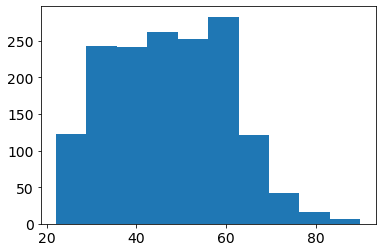

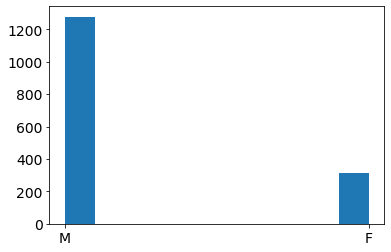

In [ ]:
plt.hist(CSN2["Eta'"])
plt.show()
plt.hist(CSN2.Genere)
plt.show()

In [ ]:
associati = []
dottorandi = []
borsisti = []
assegnisti = []
tecnici = []
for i, contratto in enumerate(CSN2.Contratti):
  if contratto.find('Associato')>=0:
    associati.append(CSN2.iloc[i])
  if contratto.find('Dottorando')>=0:
    dottorandi.append(CSN2.iloc[i])
  if contratto.find('Borsista')>=0:
    borsisti.append(CSN2.iloc[i])
  if contratto.find('Assegnista')>=0:
    assegnisti.append(CSN2.iloc[i])
  if contratto.find('Tecnico')>=0:
    tecnici.append(CSN2.iloc[i])

print (len(CSN2), len(associati), len(dottorandi), len(borsisti), len(assegnisti), len(tecnici))

1592 877 127 13 59 44


In [ ]:
tecnici

[Cognome                                                                 Aisa
 Nome                                                                 Damiano
 Eta'                                                                      52
 Genere                                                                     M
 Contratti                  (01/01/2020 - 31/12/2020) Associato Incarico d...
 Esperimenti                10% - (PG:CSN1) LHC-B (Tecnico)\n 10% - (PG:CS...
 Finanziamenti Contratto                                                     
 Name: 13, dtype: object,
 Cognome                                                                Banfi
 Nome                                                                 Stefano
 Eta'                                                                      39
 Genere                                                                     M
 Contratti                  (01/01/2020 - 31/12/2020) Associato Associazio...
 Esperimenti                          